**Company Bankruptcy Prediction Project**




# **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/575 Project

/content/drive/My Drive/Colab Notebooks/575 Project


In [ ]:
!ls

bankruptcy_sample_submission.csv  hyperparameter.csv
bankruptcy_Test_X.csv		  hyperparameter.gsheet
bankruptcy_Train.csv		  IDS_575_Final_Code_3models_End.ipynb
Company_Bankrupt.ipynb		  IDS_575_Final_Code.ipynb


# **Importing Libraries**

In [ ]:
# Importing libraries

# Data Manipulation
import pandas as pd
import numpy as np
from random import randint
from scipy import stats

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn import metrics

# Data Preprocessing and resampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

# metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


# ML Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn import svm

#Grid search - hyperparameter tuning
from sklearn.model_selection import GridSearchCV

**Reading Bankruptcy.csv file**

In [ ]:
# Reading the Bankruptcy dataset into dataframe 'df'
#Read csv and convert to pandas dataframe
df = pd.read_csv('bankruptcy_Train.csv', header = 0)


# **Printing number of features and examples**

In [ ]:
# Printing the number of features and examples in the bankruptcy dataset 
def printBasicStats(dataset):
  print('- # of features = %d' % (len(dataset.keys()) - 1))
  print('- # of examples = %d' % len(dataset))
  
printBasicStats(df)
print(df)

- # of features = 64
- # of examples = 10000
       Attr1   Attr2   Attr3   Attr4   Attr5  ...  Attr61  Attr62  Attr63  \
0    -0.0704  0.0863 -0.3440 -0.1817  0.0074  ... -0.2162 -0.0135 -0.2022   
1    -0.0315  0.0162  0.0644 -0.1325  0.0055  ... -0.2753  0.0087 -0.5894   
2    -0.3714  0.0319 -0.6809 -0.2078  0.0059  ...  0.0234 -0.0022 -0.5064   
3    -0.1706  0.0009  0.3823 -0.1024  0.0073  ... -0.2539 -0.0113 -0.3114   
4    -0.2928  0.0772 -1.0615 -0.2298  0.0063  ... -0.1645 -0.0054 -0.4617   
...      ...     ...     ...     ...     ...  ...     ...     ...     ...   
9995 -0.0252  0.0665 -1.3525 -0.2552  0.0072  ...  0.0731 -0.0171  0.1675   
9996 -0.1667 -0.0521  1.4578  0.0991  0.0069  ... -0.1317 -0.0110 -0.3225   
9997  0.4722 -0.0343  1.2530  0.0664  0.0087  ... -0.2169 -0.0153 -0.0604   
9998  0.1302  0.0634 -0.2521 -0.1522  0.0069  ... -0.0129 -0.0139 -0.1762   
9999  0.0903 -0.1308  0.7066  0.3627  0.0095  ... -0.3082 -0.0167  0.1139   

      Attr64  class  
0     0.

In [ ]:
# Checking information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10000 non-null  float64
 1   Attr2   10000 non-null  float64
 2   Attr3   10000 non-null  float64
 3   Attr4   10000 non-null  float64
 4   Attr5   10000 non-null  float64
 5   Attr6   10000 non-null  float64
 6   Attr7   10000 non-null  float64
 7   Attr8   10000 non-null  float64
 8   Attr9   10000 non-null  float64
 9   Attr10  10000 non-null  float64
 10  Attr11  10000 non-null  float64
 11  Attr12  10000 non-null  float64
 12  Attr13  10000 non-null  float64
 13  Attr14  10000 non-null  float64
 14  Attr15  10000 non-null  float64
 15  Attr16  10000 non-null  float64
 16  Attr17  10000 non-null  float64
 17  Attr18  10000 non-null  float64
 18  Attr19  10000 non-null  float64
 19  Attr20  10000 non-null  float64
 20  Attr21  10000 non-null  float64
 21  Attr22  10000 non-null  float64
 22 

# Data Preprocessing

## **Checking any NaN value presence**

In [ ]:
# Checking any NaN value presence
df.isna().sum().max()

0

## **Checking for duplicates**

In [ ]:
# Checking for duplicates
df.duplicated().sum()

56

# **Droping Duplicates**

In [ ]:
# Droping duplicates
df.drop_duplicates(keep = "first", inplace = True)
df.duplicated().sum()

0

**Printing the number of features and examples in the bankruptcy dataset after droping duplicates**

In [ ]:
# Printing the number of features and examples in the bankruptcy dataset after droping duplicates
def printBasicStats(dataset):
  print('- # of features = %d' % (len(dataset.keys()) - 1))
  print('- # of examples = %d' % len(dataset))
  
printBasicStats(df)
print(df)

- # of features = 64
- # of examples = 9944
       Attr1   Attr2   Attr3   Attr4  ...  Attr62  Attr63  Attr64  class
0    -0.0704  0.0863 -0.3440 -0.1817  ... -0.0135 -0.2022  0.0454      0
1    -0.0315  0.0162  0.0644 -0.1325  ...  0.0087 -0.5894 -0.0428      0
2    -0.3714  0.0319 -0.6809 -0.2078  ... -0.0022 -0.5064 -0.0410      1
3    -0.1706  0.0009  0.3823 -0.1024  ... -0.0113 -0.3114 -0.0190      0
4    -0.2928  0.0772 -1.0615 -0.2298  ... -0.0054 -0.4617 -0.0307      0
...      ...     ...     ...     ...  ...     ...     ...     ...    ...
9995 -0.0252  0.0665 -1.3525 -0.2552  ... -0.0171  0.1675 -0.0065      0
9996 -0.1667 -0.0521  1.4578  0.0991  ... -0.0110 -0.3225 -0.0135      0
9997  0.4722 -0.0343  1.2530  0.0664  ... -0.0153 -0.0604 -0.0045      0
9998  0.1302  0.0634 -0.2521 -0.1522  ... -0.0139 -0.1762 -0.0383      0
9999  0.0903 -0.1308  0.7066  0.3627  ... -0.0167  0.1139 -0.0443      0

[9944 rows x 65 columns]


# **Checking label distributions in the Bankruptcy dataset**

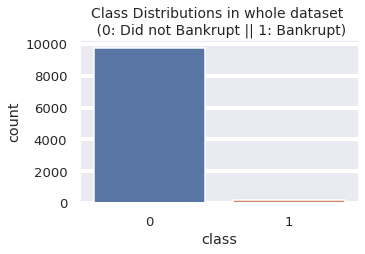

In [ ]:
# Checking labels distributions in the Bankruptcy dataset
sns.set_theme(context = 'talk', style='darkgrid', palette='deep', font='sans-serif', font_scale = 0.8, rc={"grid.linewidth": 4})

plt.figure(figsize = (5,3))
sns.countplot(df['class'])
plt.title('Class Distributions in whole dataset \n (0: Did not Bankrupt || 1: Bankrupt)', fontsize=14)
plt.show()

# **Baseline Model**

In [ ]:
# Baseline Model
# Check the output percentage of the data
print(df['class'].value_counts())
print('Companies that did not go bankrupt(Class 0): ', round(df['class'].value_counts()[0]/len(df) * 100,1), '% of whole data set')
print('Companies that went bankrupt(Class 1): ', round(df['class'].value_counts()[1]/len(df) * 100,1), '% of whole data set')

0    9731
1     213
Name: class, dtype: int64
Companies that did not go bankrupt(Class 0):  97.9 % of whole data set
Companies that went bankrupt(Class 1):  2.1 % of whole data set


**Measure the Baseline Accuracy**

In [ ]:
# Measure the Baseline Accuracy

pd.set_option('display.max_columns', 10)
# print(df.describe(exclude=None))

Counts = df['class'].value_counts()
# print(Counts)

# baseline accuracy - predicting everything as 0(majority class) = 'Did not Bankrupt'
BaseLineAcc = Counts[0]/(Counts[0] + Counts[1])
print("Baseline Accuracy:", BaseLineAcc)

Baseline Accuracy: 0.9785800482703138


**Our Baseline is 97.86**

# Exploratory Data Analysis(EDA) and Data Preprocessing

## Checking the data distribution

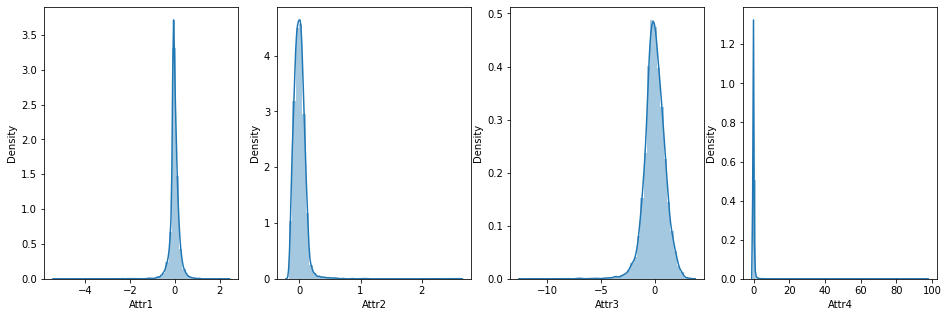

In [ ]:
# Checking the data distribution
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
sns.distplot(df['Attr1'])
plt.subplot(1,4,2)
sns.distplot(df['Attr2'])
plt.subplot(1,4,3)
sns.distplot(df['Attr3'])
plt.subplot(1,4,4)
sns.distplot(df['Attr4'])
plt.show()

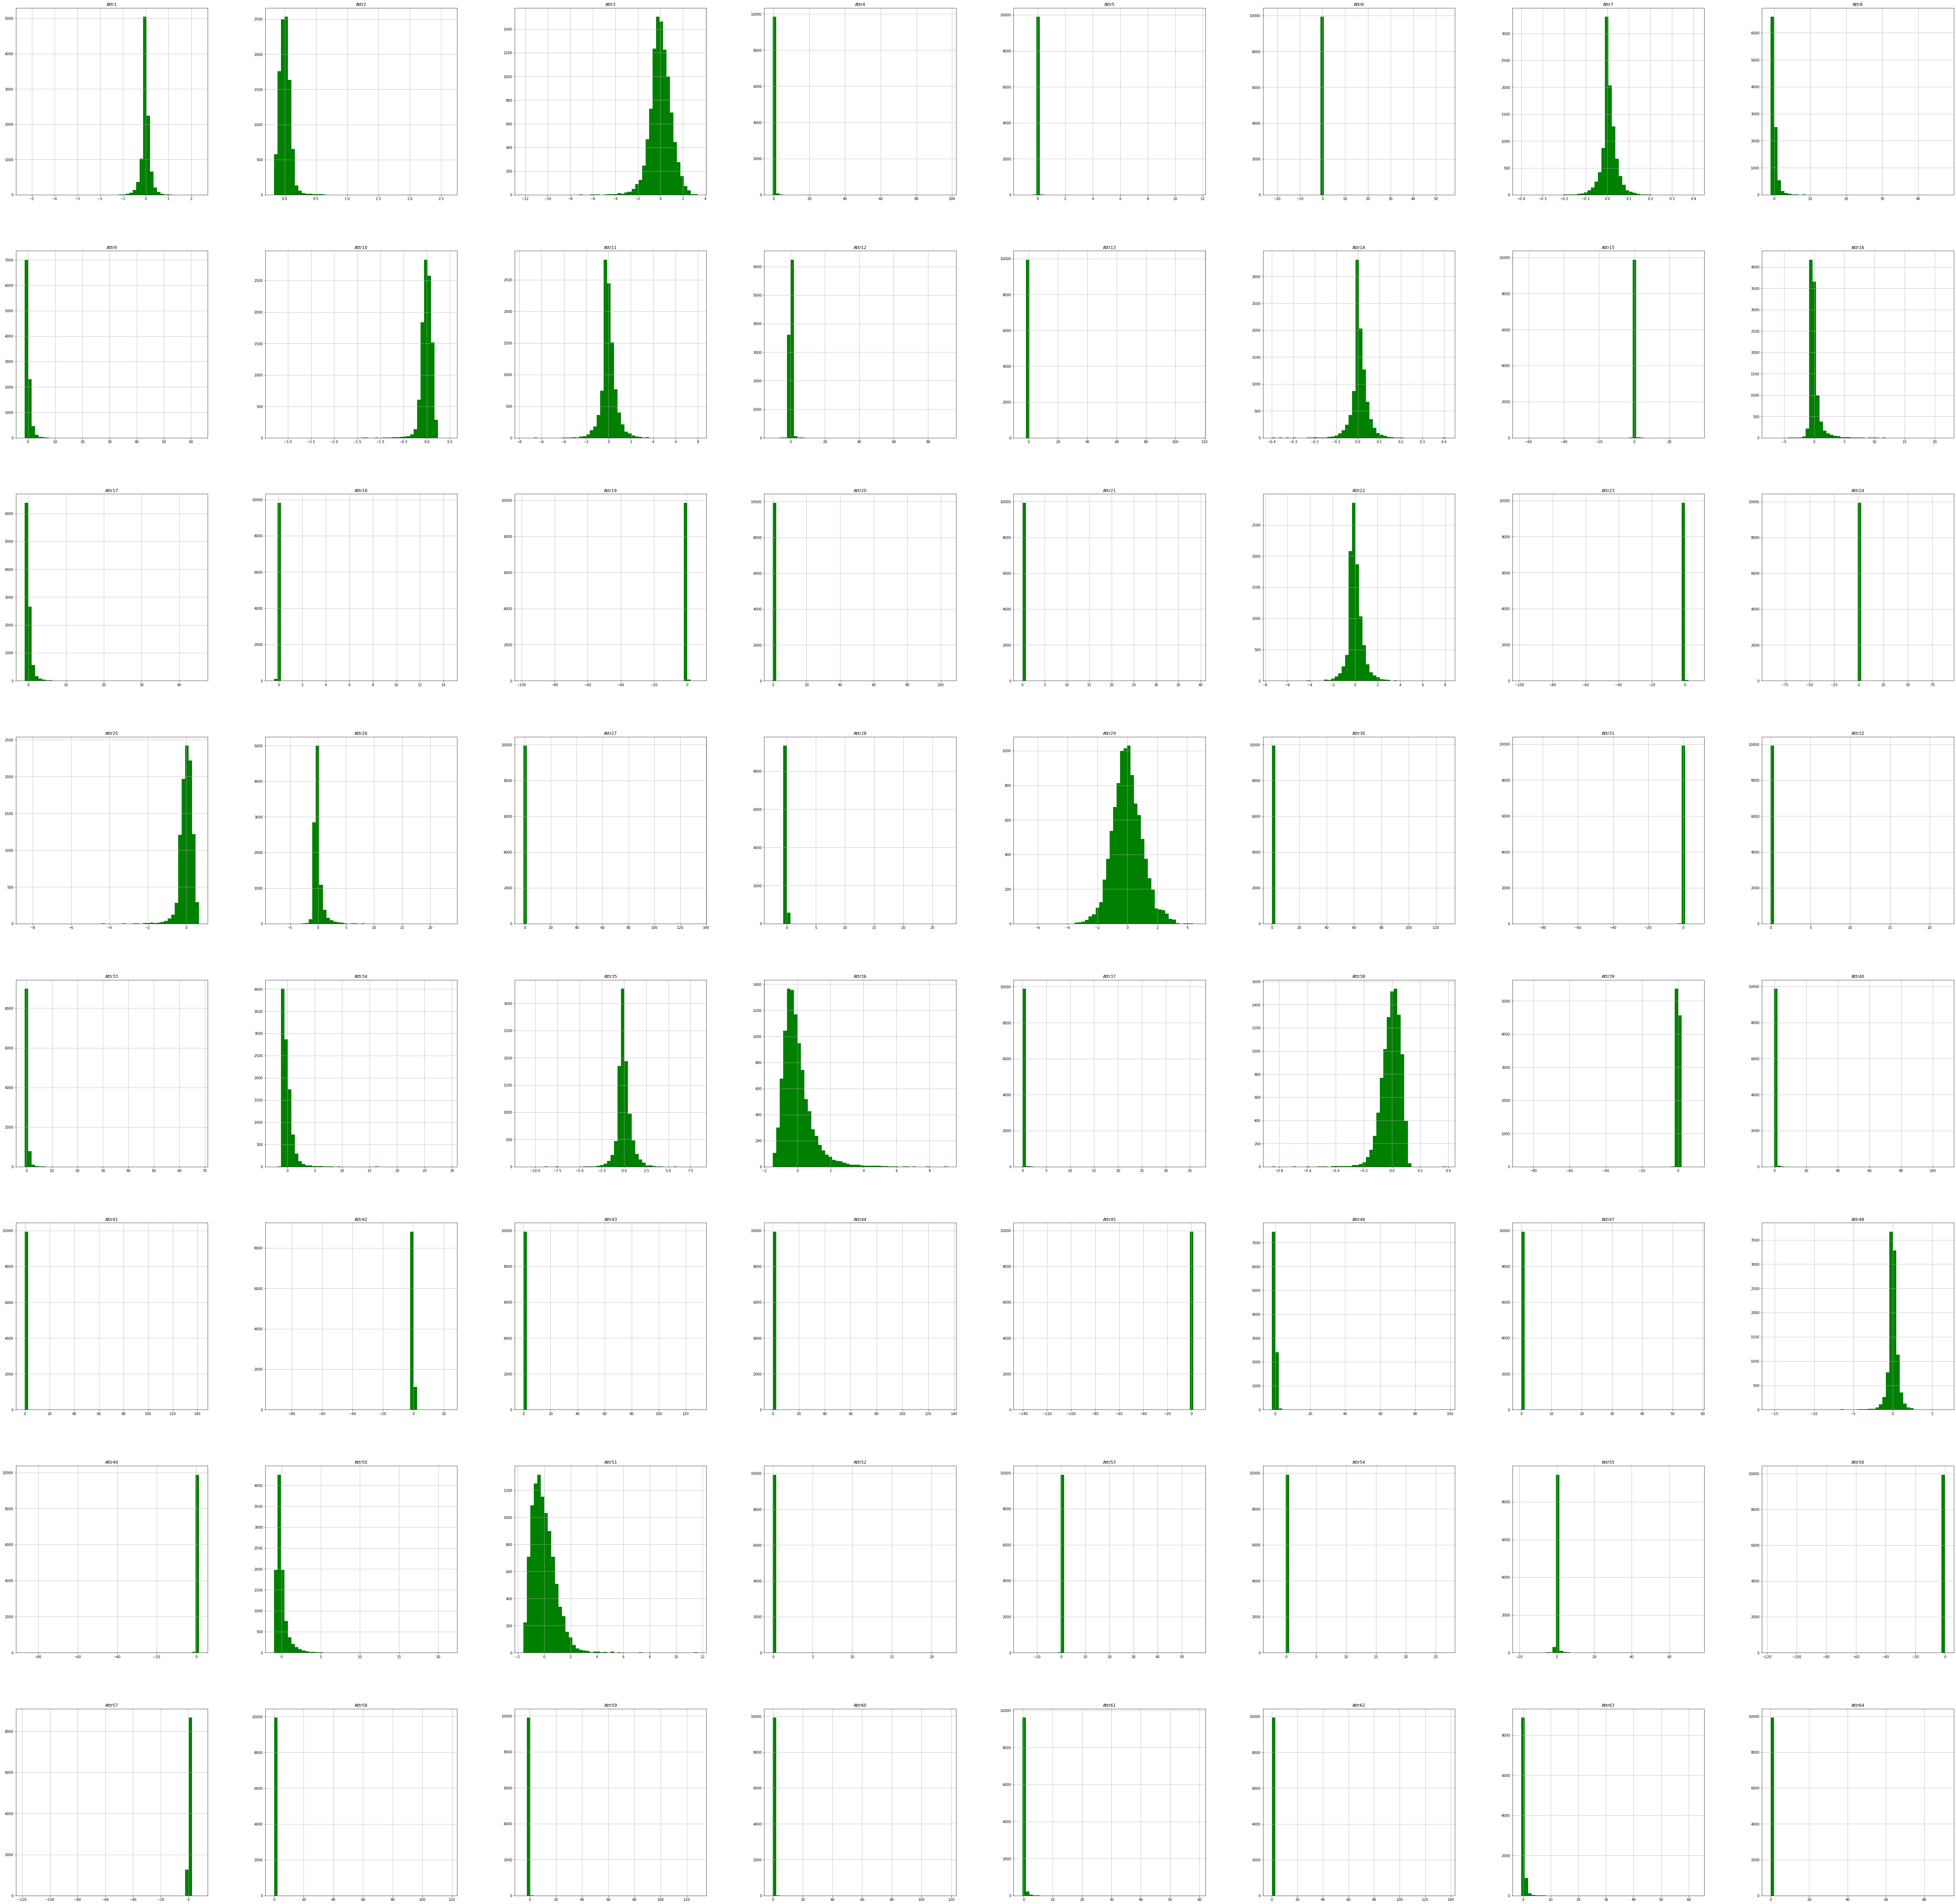

In [ ]:
Df_Plot = df.drop("class", axis=1)
Df_Plot.hist(bins = 50, figsize= (100,100), color = 'green')
plt.show()

In [ ]:
df.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'class'],
      dtype='object')

## **Checking Outliers**

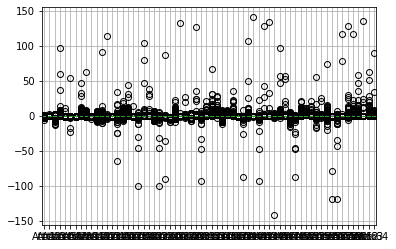

In [ ]:
Df_Plot.boxplot()

## **Outlier treatment**

In [ ]:
# Detecting outliers using Z-Score technique
x1 = df.drop('class', axis=1); y1=df['class']
z = np.abs(stats.zscore(x1))
x1 = x1[(z < 4).all(axis=1)]

In [ ]:
df = x1.join(y1)

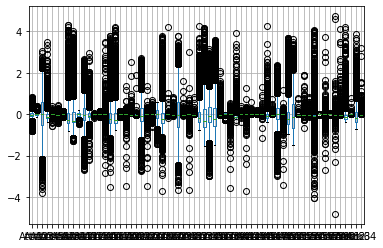

In [ ]:
x1.boxplot()

**Printing the number of features and examples in the bankruptcy dataset after treating outliers**

In [ ]:
# Printing the number of features and examples in the bankruptcy dataset after treating outliers
def printBasicStats(dataset):
  print('- # of features = %d' % (len(dataset.keys()) - 1))
  print('- # of examples = %d' % len(dataset))
  
#printBasicStats(df)
print(df)

       Attr1   Attr2   Attr3   Attr4  ...  Attr62  Attr63  Attr64  class
0    -0.0704  0.0863 -0.3440 -0.1817  ... -0.0135 -0.2022  0.0454      0
1    -0.0315  0.0162  0.0644 -0.1325  ...  0.0087 -0.5894 -0.0428      0
2    -0.3714  0.0319 -0.6809 -0.2078  ... -0.0022 -0.5064 -0.0410      1
3    -0.1706  0.0009  0.3823 -0.1024  ... -0.0113 -0.3114 -0.0190      0
4    -0.2928  0.0772 -1.0615 -0.2298  ... -0.0054 -0.4617 -0.0307      0
...      ...     ...     ...     ...  ...     ...     ...     ...    ...
9995 -0.0252  0.0665 -1.3525 -0.2552  ... -0.0171  0.1675 -0.0065      0
9996 -0.1667 -0.0521  1.4578  0.0991  ... -0.0110 -0.3225 -0.0135      0
9997  0.4722 -0.0343  1.2530  0.0664  ... -0.0153 -0.0604 -0.0045      0
9998  0.1302  0.0634 -0.2521 -0.1522  ... -0.0139 -0.1762 -0.0383      0
9999  0.0903 -0.1308  0.7066  0.3627  ... -0.0167  0.1139 -0.0443      0

[9273 rows x 65 columns]


## **Multicollinearity Check**

In [ ]:
# Check for Multicollinearity
y = df['class']
df = df.iloc[:,:64]
correlation_matrix = df.corr()
correlation_matrix.style.background_gradient(sns.light_palette('red', as_cmap=True))

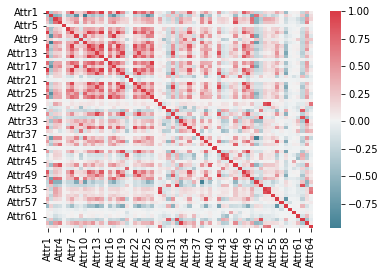

In [ ]:
sns.heatmap(df.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [ ]:
len(correlation_matrix)

64

In [ ]:
correlation_matrix = correlation_matrix.iloc[1:,1:]

**Dropping correlated features**

In [ ]:
# Dropping correlated features
drop_correlated_fea = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if(correlation_matrix.iloc[i,j] >= 0.7 or correlation_matrix.iloc[i,j] <= -0.7):
            if correlation_matrix.columns[j] not in drop_correlated_fea:
                drop_correlated_fea.append(correlation_matrix.columns[j])  

In [ ]:
len(drop_correlated_fea)

32

In [ ]:
drop_correlated_fea

['Attr3',
 'Attr2',
 'Attr8',
 'Attr7',
 'Attr11',
 'Attr12',
 'Attr14',
 'Attr10',
 'Attr16',
 'Attr13',
 'Attr18',
 'Attr19',
 'Attr22',
 'Attr23',
 'Attr9',
 'Attr31',
 'Attr39',
 'Attr20',
 'Attr43',
 'Attr4',
 'Attr40',
 'Attr35',
 'Attr42',
 'Attr17',
 'Attr38',
 'Attr32',
 'Attr28',
 'Attr53',
 'Attr56',
 'Attr30',
 'Attr52',
 'Attr33']

In [ ]:
df = df.drop(drop_correlated_fea, axis=1)

In [ ]:
correlation_matrix = df.corr()
correlation_matrix.style.background_gradient(sns.light_palette('red', as_cmap=True))

,Attr1,Attr5,Attr6,Attr15,Attr21,Attr24,Attr25,Attr26,Attr27,Attr29,Attr34,Attr36,Attr37,Attr41,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr54,Attr55,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
Attr1,1.000000,0.011745,0.476514,-0.002351,-0.007890,0.754104,0.376571,0.745197,0.064315,-0.015961,0.223737,0.196445,0.014297,-0.007747,-0.071492,0.135284,0.247831,-0.089839,0.818216,0.496149,0.295390,-0.236094,0.107673,0.141233,0.184118,-0.451646,-0.006616,0.027667,0.036338,-0.222138,0.333864,0.056034
Attr5,0.011745,1.000000,0.020176,-0.036075,0.028905,0.016415,0.026039,0.025932,0.001955,-0.016042,0.004256,-0.019818,0.002433,0.002749,0.013763,0.000415,0.067222,-0.023009,0.004078,-0.000713,0.042884,-0.073705,0.022415,0.036966,-0.006217,-0.012255,-0.000667,0.008355,-0.027309,-0.005498,0.042360,0.000274
Attr6,0.476514,0.020176,1.000000,-0.020303,-0.015125,0.649859,0.535339,0.455327,-0.005891,0.186761,-0.141429,0.075442,0.035511,-0.016639,-0.042785,0.057632,0.175990,-0.073110,0.431108,0.282521,0.292948,-0.228216,0.036411,0.181912,0.065255,-0.224404,-0.018839,0.001473,0.016292,-0.160270,0.208107,-0.021717
Attr15,-0.002351,-0.036075,-0.020303,1.000000,0.000005,-0.018579,-0.060285,-0.050233,-0.002328,0.006653,-0.012742,-0.008357,-0.000113,0.001615,0.077667,-0.000714,-0.011199,0.021230,0.007177,0.010682,-0.043209,0.064465,-0.013374,-0.004276,0.013973,-0.002311,-0.000664,0.007918,-0.028988,0.031832,-0.049250,0.025039
Attr21,-0.007890,0.028905,-0.015125,0.000005,1.000000,-0.023503,0.015000,-0.018002,-0.000883,0.038810,-0.016846,-0.026958,-0.000686,-0.001018,0.050221,-0.002557,0.022953,0.006022,-0.004015,-0.153343,-0.010151,-0.022747,-0.004184,0.032937,-0.005133,0.002154,0.003263,-0.002233,-0.014905,0.022083,-0.015701,-0.005405
Attr24,0.754104,0.016415,0.649859,-0.018579,-0.023503,1.000000,0.438820,0.633651,0.047003,-0.027612,0.232327,0.168129,0.024449,-0.012603,-0.062861,0.093117,0.274856,-0.084935,0.652066,0.396778,0.357469,-0.264646,0.127017,0.151752,0.122245,-0.345284,-0.024996,0.013658,0.039741,-0.225197,0.339123,0.039824
Attr25,0.376571,0.026039,0.535339,-0.060285,0.015000,0.438820,1.000000,0.487284,-0.005027,0.219239,-0.031574,-0.079559,0.055016,-0.026878,-0.041999,0.053176,0.348199,0.000197,0.285278,0.205423,0.553763,-0.537158,0.077962,0.232236,0.021899,-0.214509,-0.054702,-0.013096,-0.019765,-0.228354,0.339008,-0.090494
Attr26,0.745197,0.025932,0.455327,-0.050233,-0.018002,0.633651,0.487284,1.000000,0.023697,0.019446,0.248210,0.059058,0.046104,-0.017590,-0.092707,0.117120,0.418443,-0.035882,0.498638,0.327544,0.553235,-0.406213,0.074952,0.176299,0.093751,-0.398894,-0.030832,0.018138,0.063950,-0.230234,0.480746,-0.028799
Attr27,0.064315,0.001955,-0.005891,-0.002328,-0.000883,0.047003,-0.005027,0.023697,1.000000,-0.029197,0.027450,0.012983,-0.001764,-0.000637,-0.007450,0.006184,0.036609,0.000259,0.056282,0.023859,0.011855,-0.020585,0.050228,-0.001798,0.069641,-0.020601,0.020719,0.000328,-0.001827,-0.012374,0.044378,0.020832
Attr29,-0.015961,-0.016042,0.186761,0.006653,0.038810,-0.027612,0.219239,0.019446,-0.029197,1.000000,-0.447215,-0.291588,0.114027,-0.020274,0.062712,-0.004330,-0.058533,0.069238,0.010280,0.034945,-0.013815,-0.095351,-0.148223,0.260901,-0.017083,-0.086832,0.002165,-0.046850,-0.134691,0.088522,-0.187059,-0.157165


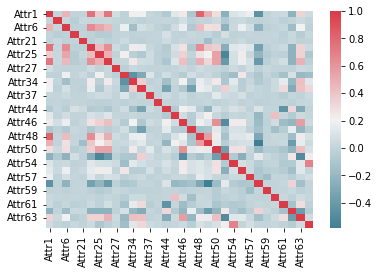

In [ ]:
sns.heatmap(df.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [ ]:
df = df.join(y)

# Final data

(No. of examples and features) to divide into train and test and build models

In [ ]:
df.shape

(9273, 33)

In [ ]:
df.columns

Index(['Attr1', 'Attr5', 'Attr6', 'Attr15', 'Attr21', 'Attr24', 'Attr25',
       'Attr26', 'Attr27', 'Attr29', 'Attr34', 'Attr36', 'Attr37', 'Attr41',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr54', 'Attr55', 'Attr57', 'Attr58', 'Attr59', 'Attr60',
       'Attr61', 'Attr62', 'Attr63', 'Attr64', 'class'],
      dtype='object')

**Split into training(80%) and validation data(20%)**

In [ ]:
# Split into training(80%) and validation data(20%)
from sklearn.model_selection import StratifiedShuffleSplit

def splitTrainTest(df, size):
  split = StratifiedShuffleSplit(n_splits=1, test_size=size, random_state=0)

  # dropping 'class' from the variables X and adding it to the target variable y
  x = df.drop('class', axis=1)
  y = df['class']  
  for trainIndexes, testIndexes in split.split(x, y):
    x_train, y_train = x.iloc[trainIndexes], y.iloc[trainIndexes]
    x_test, y_test = x.iloc[testIndexes], y.iloc[testIndexes]

  return (x_train, y_train), (x_test, y_test)

# 20% validation and 80% training data
(x_train, y_train), (x_test, y_test) = splitTrainTest(df, 0.2)

In [ ]:
# Splitted Data
print('X_train shape is ' , x_train.shape)
print('X_test shape is ' , x_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (7418, 32)
X_test shape is  (1855, 32)
y_train shape is  (7418,)
y_test shape is  (1855,)


# **Normalizing the data**

In [ ]:
#calculating mean of training set, store it in a numpy array
train_means = np.array(x_train.mean())

#calculating max and min of training set, store it in a numpy array
train_max = np.array(x_train.max())
train_min = np.array(x_train.min())

X_train_norm = (x_train - train_means)/(train_max - train_min)
X_test_norm = (x_test - train_means)/(train_max - train_min)


**Checking Label Imbalance for training and test datasets**

In [ ]:
# Checking Label Imbalance for training and test datasets
print(y_train.value_counts())
print(y_test.value_counts())

0    7263
1     155
Name: class, dtype: int64
0    1816
1      39
Name: class, dtype: int64


**Plot labels distributions - Train dataset**

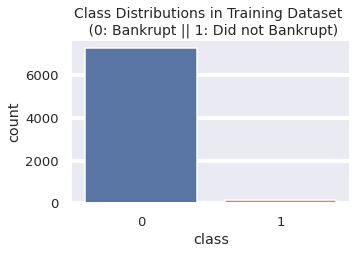

In [ ]:
# Plot labels distributions - Train dataset

sns.set_theme(context = 'talk', style='darkgrid', palette='deep', font='sans-serif', font_scale = 0.8, rc={"grid.linewidth": 4})

plt.figure(figsize = (5,3))
sns.countplot(y_train)
plt.title('Class Distributions in Training Dataset \n (0: Bankrupt || 1: Did not Bankrupt)', fontsize=14)
plt.show()

**Checking and plotting labels distributions - Test dataset**

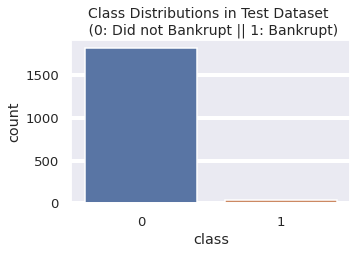

In [ ]:
# Checking labels distributions - Test dataset

sns.set_theme(context = 'talk', style='darkgrid', palette='deep', font='sans-serif', font_scale = 0.8, rc={"grid.linewidth": 4})

plt.figure(figsize = (5,3))
sns.countplot(y_test)
plt.title('Class Distributions in Test Dataset \n (0: Did not Bankrupt || 1: Bankrupt)', fontsize=14)
plt.show()

# **Upsampling the training data because of highly imbalanced labels**

In [ ]:
# Upsampling the training data

#Initializing SMOTE
sm = SMOTE(random_state = 42)
x_train_smote, y_train_smote = sm.fit_resample(X_train_norm, y_train)

**Data after upsampling**

In [ ]:
print('X_train_smote shape is ' , x_train_smote.shape) # Train data after SMOTE
print('y_train_smote shape is ' , y_train_smote.shape) # Train data after SMOTE
print('X_test shape is ' , x_test.shape) # Original test data
print('y_test shape is ' , y_test.shape) # Original test data

X_train_smote shape is  (14526, 32)
y_train_smote shape is  (14526,)
X_test shape is  (1855, 32)
y_test shape is  (1855,)


**Checking labels distributions after Upsampling - Train dataset**

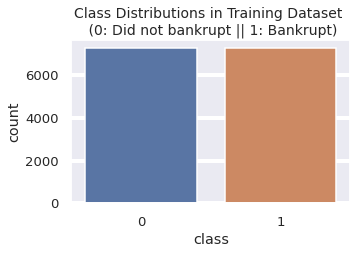

In [ ]:
# Checking labels distributions after Upsampling - Train dataset

sns.set_theme(context = 'talk', style='darkgrid', palette='deep', font='sans-serif', font_scale = 0.8, rc={"grid.linewidth": 4})

plt.figure(figsize = (5,3))
sns.countplot(y_train_smote)
plt.title('Class Distributions in Training Dataset \n (0: Did not bankrupt || 1: Bankrupt)', fontsize=14)
plt.show()

# **Confusion Matrix Function**

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='nipy_spectral',     
                          title=None):
  
      # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual')
        plt.xlabel('Predicted' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

# **MODELS**

**## Logistic Regression**

### **Logistic Regression (without Cross validation)**

Accuracy train: 0.8365000688420763
Confusion matrix for training data:
[[5425 1838]
 [ 537 6726]]



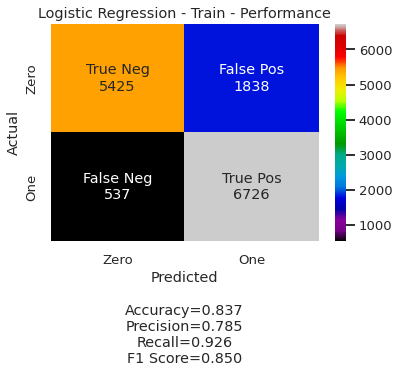

In [ ]:
#Logistic Regression (without cross validation)

def doLogisticRegression(x, y):
  # Instanciate an object from Logistic Regression class.
  lr = LogisticRegression()

  # training and prediction
  lr.fit(x, y)
  y_pred = lr.predict(x)

  # Return training accuracy and confusion matrix
  return accuracy_score(y, y_pred), confusion_matrix(y, y_pred), lr

# training the model on training data and printing training accuracy and confusion matrix
TrainAcc, TrainConf, LR = doLogisticRegression(x_train_smote, y_train_smote)
print("Accuracy train:", TrainAcc)
print('Confusion matrix for training data:')
print(TrainConf)


model_name = 'Logistic Regression - Train'
cm = TrainConf
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False)
plt.title(f'{model_name} - Performance')
print()

Accuracy Test: 0.7660377358490567
Confusion matrix for test data:
[[1390  426]
 [   8   31]]
F1 score Test: 0.12500000000000003
Accuracy = 0.77
Recall = 0.79

Precision: 0.06783369803063458



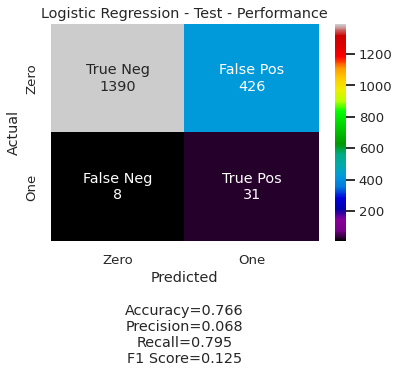

In [ ]:
# performing predictions on the validation(test) data and printing test accuracy and confusion matrix
y_test_pred = LR.predict(X_test_norm)

TestAcc, TestConf = accuracy_score(y_test, y_test_pred), confusion_matrix(y_test, y_test_pred)
print("Accuracy Test:",TestAcc)
print('Confusion matrix for test data:')
print(TestConf)
print("F1 score Test:",f1_score(y_test,y_test_pred))
print(f'Accuracy = {accuracy_score(y_test, y_test_pred):.2f}\nRecall = {recall_score(y_test, y_test_pred):.2f}\n')
print("Precision:",metrics.precision_score(y_test, y_test_pred))

model_name = 'Logistic Regression - Test'
cm = confusion_matrix(y_test, y_test_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False)
plt.title(f'{model_name} - Performance')
print()

### **Logistic Regression (Using Cross Validation)**

In [ ]:
#Models
#Logistic Regression (Using Cross Validation)

pipeline_lr = make_pipeline (StandardScaler(),LogisticRegression( penalty='none', C=1.0, solver='saga', random_state=24 ))
pipeline_lr.fit ( x_train_smote, y_train_smote )
scores = cross_val_score ( estimator=pipeline_lr,
                          X = x_train_smote,
                          y = y_train_smote,
                          cv=10,
                          n_jobs = 2)
y_pred_lr = pipeline_lr.predict (X_test_norm)
print ( 'Accuracy train: %.3f' %pipeline_lr.score (x_train_smote, y_train_smote) )
print ( 'Accuracy cross-validation: %.3f' %scores.mean() )
print ( 'Accuracy test: %.3f' %pipeline_lr.score (X_test_norm, y_test) )

LR_acc = pipeline_lr.score (X_test_norm, y_test)


Accuracy train: 0.846
Accuracy cross-validation: 0.846
Accuracy test: 0.775


0.8503049813622502


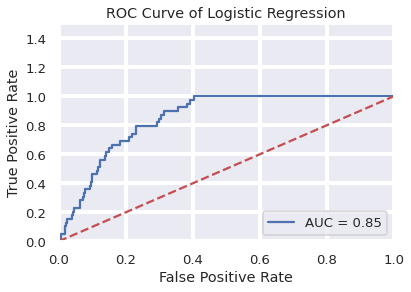

In [ ]:
# PR Curve and ROC - Logistic Regression

def drawPRandRoc(x_train_smote, y_train_smote, X_test_norm, y_test):
  figure, (ax1, ax2) = plt.subplots(1, 2, figsize = (9,3))
  
  trainAcc, trainConf, LR = doLogisticRegression(x_train_smote, y_train_smote)
  y_test_pred = LR.predict(X_test_norm)
  y_test_pred_prob = LR.predict_proba(x_test)[:, 1]
       
  # Draw a precision-recall curve.
  precision, recall, thresholds_pr = precision_recall_curve(y_test, y_test_pred_prob)
  avg_pre = average_precision_score(y_test, y_test_pred_prob)
  ax1.plot(precision, recall, label = " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
  ax1.set_xlabel('Precision', fontsize = 14)
  ax1.set_ylabel('Recall', fontsize = 14)
  ax1.set_title('Precision-Recall Curve', fontsize = 18)
  ax1.legend(loc = 'best')
  
  # Find the default threshold
  close_default = np.argmin(np.abs(thresholds_pr - 0.5))
  ax1.plot(precision[close_default], recall[close_default], 'o', markersize = 8)

  # Draw the roc-curve
  logis_fpr, logis_tpr, thresholds_roc = roc_curve(y_test, y_test_pred_prob)
  roc_auc_logis= auc(logis_fpr,logis_tpr)
  ax2.plot(logis_fpr,logis_tpr, label = " area = {:0.2f}".format(roc_auc_logis), lw = 3, alpha = 0.7)
  ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
  ax2.set_xlabel("False Positive Rate", fontsize = 14)
  ax2.set_ylabel("True Positive Rate", fontsize = 14)
  ax2.set_title("ROC Curve", fontsize = 18)
  ax2.legend(loc = 'best')

  # Find the default threshold
  close_default = np.argmin(np.abs(thresholds_roc - 0.5))
  ax2.plot(logis_fpr[close_default], logis_tpr[close_default], 'o', markersize = 8)
  plt.tight_layout()


y_scores = LR.predict_proba(X_test_norm)
logis_fpr, logis_tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_logis = auc(logis_fpr, logis_tpr)
print(roc_auc_logis)

plt.title('Receiver Operating Characteristic')
plt.plot(logis_fpr, logis_tpr, 'b', label = 'AUC = %0.2f' % roc_auc_logis)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.show()

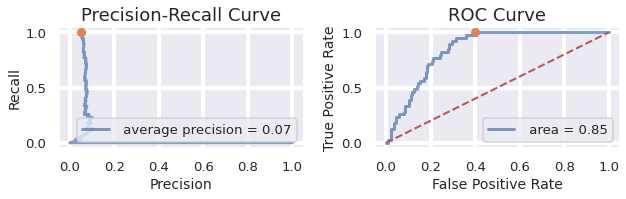

In [ ]:
drawPRandRoc(x_train_smote, y_train_smote, X_test_norm, y_test)

**PCA - how does it impact the model**

In [ ]:
# PCA

# scaling the data for PCA

scaler = StandardScaler()
scaler.fit(x_train_smote)
Xtrn_scaled = scaler.transform(x_train_smote)
Xtst_scaled = scaler.transform(X_test_norm)

# retaining 95% of the variance
pca = PCA(.95)

pca.fit(Xtrn_scaled)

Xtrn_pca = pca.transform(Xtrn_scaled)
Xtst_pca = pca.transform(Xtst_scaled)

### **Logistic Regression after PCA**

In [ ]:
#Logistic Regression after PCA

def doLogisticRegression(x, y):
  # Instanciate an object from Logistic Regression class.
  lr = LogisticRegression()

  # training and prediction
  lr.fit(x, y)
  y_pred = lr.predict(x)

  # Return training accuracy and confusion matrix
  return accuracy_score(y, y_pred), confusion_matrix(y, y_pred), lr

# training the model on training data and printing training accuracy and confusion matrix
TrainAcc, TrainConf, LR = doLogisticRegression(Xtrn_pca, y_train_smote)

# performing predictions on the test data and printing test accuracy and confusion matrix
y_test_pred = LR.predict(Xtst_pca)

TestAcc, TestConf = accuracy_score(y_test, y_test_pred), confusion_matrix(y_test, y_test_pred)

print('training accuracy with PCA = %.4f' % (TrainAcc))
print('training accuracy without PCA = 0.8297')
print('confusion matrix for training data:')
print(TrainConf)
print()
print('test accuracy with PCA = %.4f' % (TestAcc))
print('test accuracy without PCA = 0.7811')
print('confusion matrix for test data:')
print(TestConf)

training accuracy with PCA = 0.8228
training accuracy without PCA = 0.8297
confusion matrix for training data:
[[5504 1759]
 [ 815 6448]]

test accuracy with PCA = 0.7666
test accuracy without PCA = 0.7811
confusion matrix for test data:
[[1392  424]
 [   9   30]]


**We can see that PCA didnt improve the accuracy of the model in case of the given dataset**

## **Naive Bayes Model**

In [ ]:
# Naive Bayes Model - Before PCA

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
naivetrain = gnb.fit(x_train_smote, y_train_smote)

#Predict the response for test dataset
y_pred = gnb.predict(X_test_norm)

Accuracy train: 0.6501445683601818
Confusion matrix for training data:
[[2527 4736]
 [ 346 6917]]



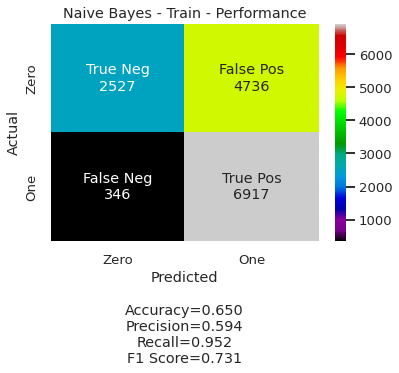

In [ ]:
y_train_pred = naivetrain.predict(x_train_smote)

print("Accuracy train:", accuracy_score(y_train_smote, y_train_pred))
print('Confusion matrix for training data:')
print(confusion_matrix(y_train_smote, y_train_pred))

model_name = 'Naive Bayes - Train'
cm = confusion_matrix(y_train_smote, y_train_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False)
plt.title(f'{model_name} - Performance')
print()

Accuracy Test: 0.35471698113207545
Confusion matrix for test data:
[[ 628 1188]
 [   9   30]]
Precision: 0.024630541871921183
Recall: 0.7692307692307693
F1 Score: 0.0477326968973747



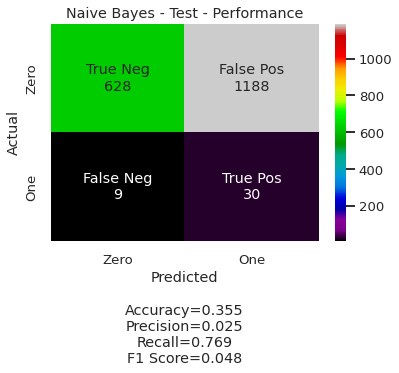

In [ ]:
TestAcc, TestConf = accuracy_score(y_test, y_pred), confusion_matrix(y_test, y_pred)
print("Accuracy Test:", TestAcc)
print('Confusion matrix for test data:')
print(TestConf)

NB_acc = TestAcc
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

model_name = 'Naive Bayes - Test'
cm = confusion_matrix(y_test, y_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False)
plt.title(f'{model_name} - Performance')
print()

0.5970786738958545


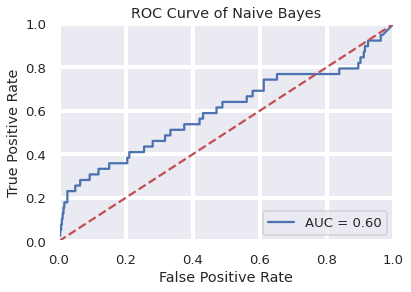

In [ ]:
# ROC - Naive Bayes
y_scores = gnb.predict_proba(X_test_norm)
naive_fpr, naive_tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_naive = auc(naive_fpr, naive_tpr)
print(roc_auc_naive)

plt.title('Receiver Operating Characteristic')
plt.plot(naive_fpr, naive_tpr, 'b', label = 'AUC = %0.2f' % roc_auc_naive)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes')
plt.show()

### **Naive Bayes Model - After PCA**

In [ ]:
# Naive Bayes Model - After PCA

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(Xtrn_pca, y_train_smote)

#Predict the response for test dataset
y_pred = gnb.predict(Xtst_pca)

#Predict the response for train dataset
y_pred_NB = gnb.predict(Xtrn_pca)

print("Accuracy train:", accuracy_score(y_train_smote, y_pred_NB))

Accuracy train: 0.5850888062783973


In [ ]:
TestAcc, TestConf = accuracy_score(y_test, y_pred), confusion_matrix(y_test, y_pred)
print(TestAcc)
print(TestConf)

0.25929919137466306
[[ 454 1362]
 [  12   27]]


**Even in case of Naive Bayes, PCA doesnt increase the accuracy**

In [ ]:


# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Precision: 0.019438444924406047
Recall: 0.6923076923076923
F1 Score: 0.037815126050420166


0.5246526601152152


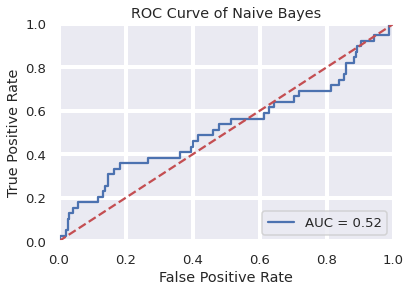

In [ ]:
y_scores = gnb.predict_proba(Xtst_pca)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes')
plt.show()

## **KNN Model**

In [ ]:
# KNN Model

def trainKnn(x, y, k=1):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x, y)
  pred = model.predict(x)
  accuracy = sum(pred == y) / len(x)    
  return model, accuracy

In [ ]:
Model, Acc_train = trainKnn(x_train_smote, y_train_smote, 1)
print("Accuracy Train with k=1:", Acc_train)
Model3, Acc_train3 = trainKnn(x_train_smote, y_train_smote, 3)
print("Accuracy Train with k=3:", Acc_train3)

Accuracy Train with k=1: 1.0
Accuracy Train with k=3: 0.9760429574555969


### **Finding the best K based on training & test accuracies**

In [ ]:
def testKnn(model, x, y):
  pred = model.predict(x)
  accuracy = sum(pred == y) / len(x)
  return accuracy 
  
testKnn(Model, X_test_norm, y_test)
for k in range(1, 10):
  Model_k, Acc_train = trainKnn(x_train_smote, y_train_smote, k)
  Acc_test = testKnn(Model_k, X_test_norm, y_test)
  print('%d-NN --> training accuracy = %.4f  /  test accuracy = %.4f' % (k, Acc_train, Acc_test))

1-NN --> training accuracy = 1.0000  /  test accuracy = 0.9385
2-NN --> training accuracy = 0.9999  /  test accuracy = 0.9407
3-NN --> training accuracy = 0.9760  /  test accuracy = 0.9094
4-NN --> training accuracy = 0.9781  /  test accuracy = 0.9154
5-NN --> training accuracy = 0.9616  /  test accuracy = 0.8879
6-NN --> training accuracy = 0.9643  /  test accuracy = 0.8933
7-NN --> training accuracy = 0.9504  /  test accuracy = 0.8712
8-NN --> training accuracy = 0.9537  /  test accuracy = 0.8755
9-NN --> training accuracy = 0.9416  /  test accuracy = 0.8652


**k = 2 has the best values of training and test accuracies**

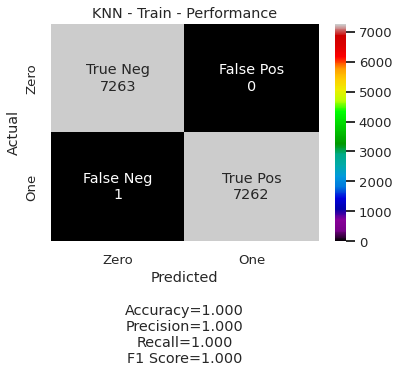

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(x_train_smote, y_train_smote)
train_preds = knn_model.predict(x_train_smote)
test_preds = knn_model.predict(X_test_norm)
test_preds=test_preds.round(0)
TestAcc, TestConf = accuracy_score(y_test, test_preds), confusion_matrix(y_test, test_preds)
y_test_pred_prob = knn_model.predict_proba(X_test_norm)
y_test_pred_prob = pd.DataFrame(y_test_pred_prob)


model_name = 'KNN - Train'
cm = confusion_matrix(y_train_smote, train_preds)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False)
plt.title(f'{model_name} - Performance')
print()

Accuracy test: 0.9407008086253369
confusion matrix for test data:
[[1739   77]
 [  33    6]]
F1 score: 0.09836065573770492
Accuracy = 0.94
Recall = 0.15

Precision: 0.07228915662650602



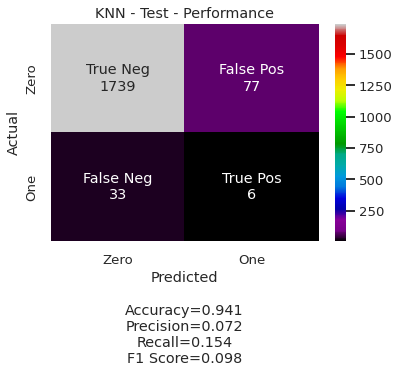

In [ ]:
print("Accuracy test:",TestAcc)
KNN_acc = TestAcc
print('confusion matrix for test data:')
print(TestConf)
print("F1 score:",f1_score(y_test,test_preds))
print(f'Accuracy = {accuracy_score(y_test, test_preds):.2f}\nRecall = {recall_score(y_test, test_preds):.2f}\n')
print("Precision:",metrics.precision_score(y_test, test_preds))


model_name = 'KNN - Test'
cm = TestConf
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False)
plt.title(f'{model_name} - Performance')
print()

0.6007991641251553


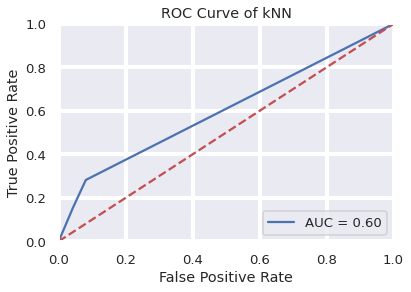

In [ ]:
# ROC - KNN Model
y_scores = knn_model.predict_proba(X_test_norm)
KNN_fpr, KNN_tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_KNN = auc(KNN_fpr, KNN_tpr)
print(roc_auc_KNN)

plt.title('Receiver Operating Characteristic')
plt.plot(KNN_fpr, KNN_tpr, 'b', label = 'AUC = %0.2f' % roc_auc_KNN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## **SVM**

In [ ]:
### SVM
# training SVM
# C = 1e10 is for hard margin classifier
# C value for soft-margin classifiers will be entered manually as we proceed

def train_SVM(xdata, ydata, C, kernel='rbf'):
  if C is None:
    model = SVC(kernel = kernel, C = 1e10)
  else:
    model = SVC(kernel = kernel, C = C)
  model.fit(xdata, ydata)
  return model

### **Soft Margin SVM**

Accuracy train: 0.9379044471981275
Confusion matrix for train data:
[[6361  902]
 [   0 7263]]



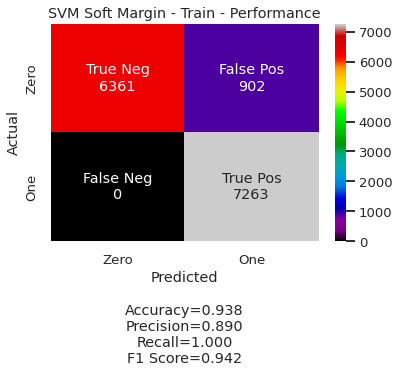

In [ ]:
SVM1 = train_SVM(x_train_smote, y_train_smote, C=1)

# training accuracy for SVM1
y_train_pred = SVM1.predict(x_train_smote)

print("Accuracy train:", accuracy_score(y_train_smote, y_train_pred))
print('Confusion matrix for train data:')
print(confusion_matrix(y_train_smote, y_train_pred))

model_name = 'SVM Soft Margin - Train'
cm = confusion_matrix(y_train_smote, y_train_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False)
plt.title(f'{model_name} - Performance')
print()




Accuracy test: 0.8733153638814016
Confusion matrix for test data:
[[1598  218]
 [  17   22]]
Precision: 0.09166666666666666
Recall: 0.5641025641025641
F1 Score: 0.15770609318996415



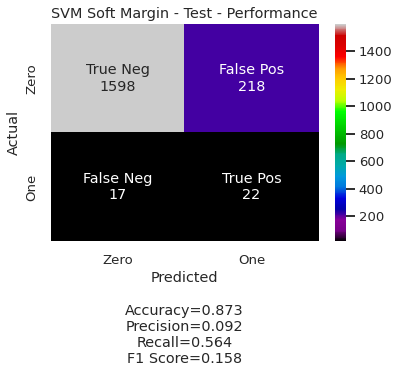

In [ ]:
y_test_pred = SVM1.predict(X_test_norm)
Soft_SVM_acc = accuracy_score(y_test, y_test_pred)
print("Accuracy test:", accuracy_score(y_test, y_test_pred))
print('Confusion matrix for test data:')
print(confusion_matrix(y_test, y_test_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_test_pred))

# Model Recall and F1 Score
print("Recall:",metrics.recall_score(y_test, y_test_pred))
print("F1 Score:",f1_score(y_test,y_test_pred))

model_name = 'SVM Soft Margin - Test'
cm = confusion_matrix(y_test, y_test_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False)
plt.title(f'{model_name} - Performance')
print()

Average precision-recall score: 0.10


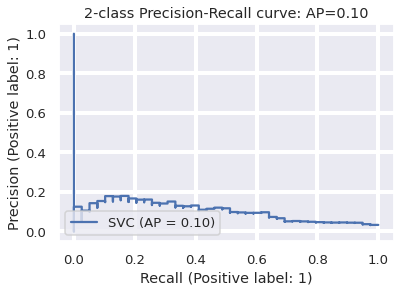

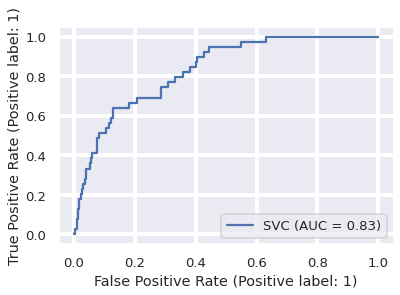

0.8319637411047103


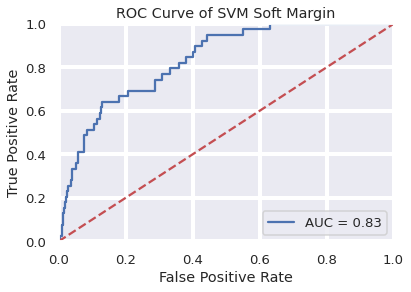

In [ ]:
# Average Precision and ROC - Soft Margin SVM
y_score = SVM1.decision_function(X_test_norm)

average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

disp = plot_precision_recall_curve(SVM1, X_test_norm, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision))

metrics.plot_roc_curve(SVM1, X_test_norm, y_test)  
plt.show() 


# ROC - SVM Soft Margin Model
y_score = SVM1.decision_function(X_test_norm)
#y_scores = SVM1.predict_proba(X_test_norm)
SoftSVM_fpr, SoftSVM_tpr, threshold = roc_curve(y_test, y_score)
roc_auc_SoftSVM = auc(SoftSVM_fpr, SoftSVM_tpr)
print(roc_auc_SoftSVM)

plt.title('Receiver Operating Characteristic')
plt.plot(SoftSVM_fpr, SoftSVM_tpr, 'b', label = 'AUC = %0.2f' % roc_auc_SoftSVM)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of SVM Soft Margin')
plt.show()

### **Hard Margin SVM**

Accuracy train: 1.0
Confusion matrix for train data:
[[7263    0]
 [   0 7263]]



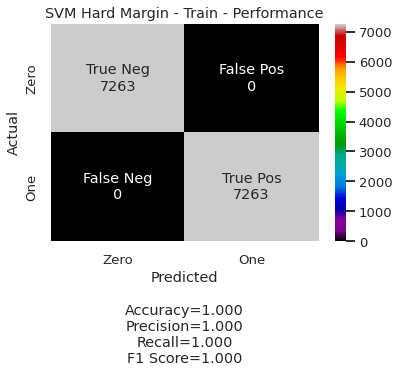

In [ ]:
# Hard Margin SVM 

SVM_hard_norm = train_SVM(x_train_smote, y_train_smote, C = 1e10)

# training accuracy and confusion matrix
y_train_pred = SVM_hard_norm.predict(x_train_smote)

print("Accuracy train:",accuracy_score(y_train_smote, y_train_pred))
print('Confusion matrix for train data:')
print(confusion_matrix(y_train_smote, y_train_pred))

model_name = 'SVM Hard Margin - Train'
cm = confusion_matrix(y_train_smote, y_train_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False)
plt.title(f'{model_name} - Performance')
print()


Accuracy test: 0.9714285714285714
Confusion matrix for test data:
[[1788   28]
 [  25   14]]
Precision: 0.3333333333333333
Recall: 0.358974358974359
F1 Score: 0.345679012345679



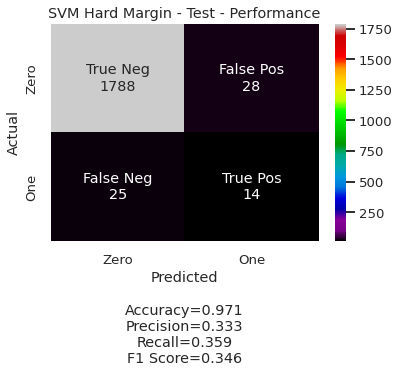

In [ ]:
# test accuracy and confusion matrix
y_test_pred = SVM_hard_norm.predict(X_test_norm)

print("Accuracy test:",accuracy_score(y_test, y_test_pred))
print('Confusion matrix for test data:')
print(confusion_matrix(y_test, y_test_pred))
HardSVM_acc = accuracy_score(y_test, y_test_pred)
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_test_pred))

# Model Recall and F1 Score
print("Recall:",metrics.recall_score(y_test, y_test_pred))
print("F1 Score:",f1_score(y_test,y_test_pred))

model_name = 'SVM Hard Margin - Test'
cm = confusion_matrix(y_test, y_test_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False)
plt.title(f'{model_name} - Performance')
print()

Average precision-recall score: 0.23


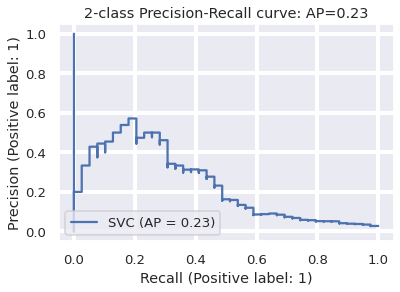

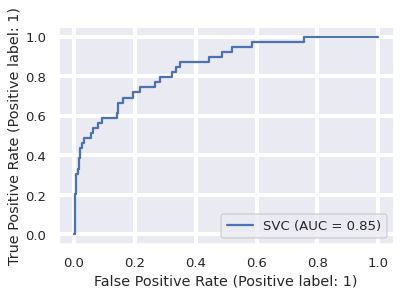

0.8505026544674122


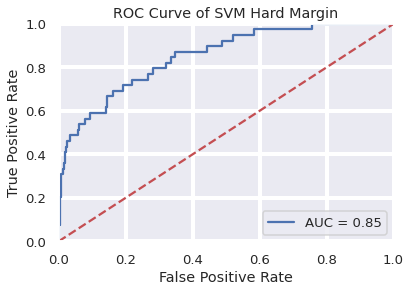

In [ ]:
# Average Precision and ROC - Hard Margin SVM
y_score = SVM_hard_norm.decision_function(X_test_norm)

average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

disp = plot_precision_recall_curve(SVM_hard_norm, X_test_norm, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision))

metrics.plot_roc_curve(SVM_hard_norm, X_test_norm, y_test)  
plt.show() 


# ROC - SVM Soft Margin Model
y_score = SVM_hard_norm.decision_function(X_test_norm)
#y_scores = SVM1.predict_proba(X_test_norm)
HardSVM_fpr, HardSVM_tpr, threshold = roc_curve(y_test, y_score)
roc_auc_HardSVM = auc(HardSVM_fpr, HardSVM_tpr)
print(roc_auc_HardSVM)

plt.title('Receiver Operating Characteristic')
plt.plot(HardSVM_fpr, HardSVM_tpr, 'b', label = 'AUC = %0.2f' % roc_auc_HardSVM)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of SVM Hard Margin')
plt.show()


### **For different values of C**

In [ ]:
# For different values of C 
train_acc = []
test_acc = []
C_val = [0.125, 0.5, 1, 25, 50, 100, 150, 200]
for C in C_val:

  SVM_hard_norm = train_SVM(x_train_smote, y_train_smote, C=C)

  # training accuracy for SVM_hard_norm
  y_trn_pred = SVM_hard_norm.predict(x_train_smote)
 
  print('training accuracy: SVM C = %.4f is %.4f' % (C, accuracy_score(y_train_smote, y_trn_pred)))
  print('Confusion matrix for training data:')
  print(confusion_matrix(y_train_smote, y_trn_pred))
  train_acc.append(accuracy_score(y_train_smote, y_trn_pred))

  # test accuracy and confusion matrix
  y_tst_pred = SVM_hard_norm.predict(X_test_norm)

  print('Test accuracy: SVM C = %.4f is %.4f' % (C, accuracy_score(y_test, y_tst_pred)))
  print('Confusion matrix for test data:')
  print(confusion_matrix(y_test, y_tst_pred))
  test_acc.append(accuracy_score(y_test, y_tst_pred))


training accuracy: SVM C = 0.1250 is 0.8867
Confusion matrix for training data:
[[5693 1570]
 [  76 7187]]
Test accuracy: SVM C = 0.1250 is 0.7914
Confusion matrix for test data:
[[1444  372]
 [  15   24]]
training accuracy: SVM C = 0.5000 is 0.9215
Confusion matrix for training data:
[[6130 1133]
 [   8 7255]]
Test accuracy: SVM C = 0.5000 is 0.8464
Confusion matrix for test data:
[[1546  270]
 [  15   24]]
training accuracy: SVM C = 1.0000 is 0.9379
Confusion matrix for training data:
[[6361  902]
 [   0 7263]]
Test accuracy: SVM C = 1.0000 is 0.8733
Confusion matrix for test data:
[[1598  218]
 [  17   22]]
training accuracy: SVM C = 25.0000 is 0.9886
Confusion matrix for training data:
[[7097  166]
 [   0 7263]]
Test accuracy: SVM C = 25.0000 is 0.9601
Confusion matrix for test data:
[[1764   52]
 [  22   17]]
training accuracy: SVM C = 50.0000 is 0.9928
Confusion matrix for training data:
[[7158  105]
 [   0 7263]]
Test accuracy: SVM C = 50.0000 is 0.9639
Confusion matrix for test

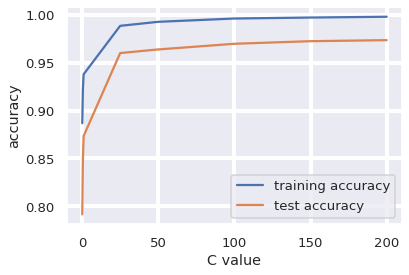

In [ ]:
fig, plots = plt.subplots()
plots.plot(C_val, train_acc, label='training accuracy') 
plots.plot(C_val, test_acc, label='test accuracy') 

plots.set_ylabel('accuracy')
plots.set_xlabel('C value')
plots.legend()

### **For Best C**

In [ ]:
SVM_best_C = max(test_acc)
print(SVM_best_C)

0.9735849056603774


training accuracy: SVM best C is 0.9981
Confusion matrix for training data:
[[7235   28]
 [   0 7263]]
Test accuracy: SVM best C is 0.9736
Confusion matrix for test data:
[[1790   26]
 [  23   16]]
Average precision-recall score: 0.23


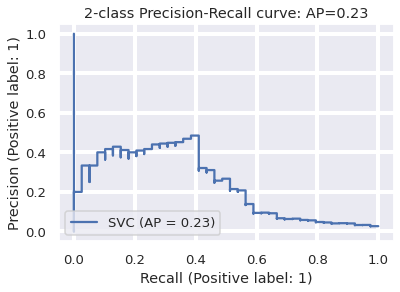

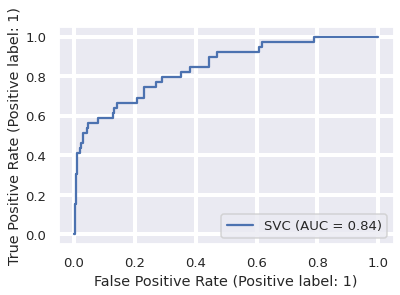

0.8435982152942505


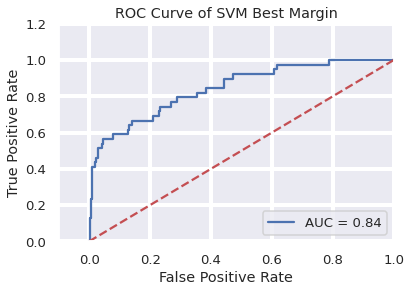

In [ ]:
# Average Precision and ROC - Best C SVM

SVM_best_model = train_SVM(x_train_smote, y_train_smote, C=200)

# training accuracy for SVM_hard_norm
y_trn_pred = SVM_best_model.predict(x_train_smote)

print('training accuracy: SVM best C is %.4f' % (accuracy_score(y_train_smote, y_trn_pred)))
print('Confusion matrix for training data:')
print(confusion_matrix(y_train_smote, y_trn_pred))
train_acc.append(accuracy_score(y_train_smote, y_trn_pred))

# test accuracy and confusion matrix
y_tst_pred = SVM_best_model.predict(X_test_norm)

print('Test accuracy: SVM best C is %.4f' % (accuracy_score(y_test, y_tst_pred)))
print('Confusion matrix for test data:')
print(confusion_matrix(y_test, y_tst_pred))
test_acc.append(accuracy_score(y_test, y_tst_pred))

y_score = SVM_best_model.decision_function(X_test_norm)

average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

disp = plot_precision_recall_curve(SVM_best_model, X_test_norm, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision))

metrics.plot_roc_curve(SVM_best_model, X_test_norm, y_test)  
plt.show() 


# ROC - SVM best Margin Model
y_score = SVM_best_model.decision_function(X_test_norm)
#y_scores = SVM1.predict_proba(X_test_norm)
bestSVM_fpr, bestSVM_tpr, threshold = roc_curve(y_test, y_score)
roc_auc_bestSVM = auc(bestSVM_fpr, bestSVM_tpr)
print(roc_auc_bestSVM)

plt.title('Receiver Operating Characteristic')
plt.plot(bestSVM_fpr, bestSVM_tpr, 'b', label = 'AUC = %0.2f' % roc_auc_bestSVM)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1])
plt.ylim([0, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of SVM Best Margin')
plt.show()


**Increasing the Value of C, the accuracy also increases**

# ** Test Accuracy & ROC Graphs for all models together**

In [ ]:
models = pd.DataFrame({
    'Model': ['LR', 'NB', 'SVM c= 200', 
              'K - NN','Hard SVM', 'Soft SVM'],
    'Accuracy': [LR_acc, NB_acc, SVM_best_C, KNN_acc, HardSVM_acc, Soft_SVM_acc]})

models = models.sort_values(by='Accuracy',ascending= False)


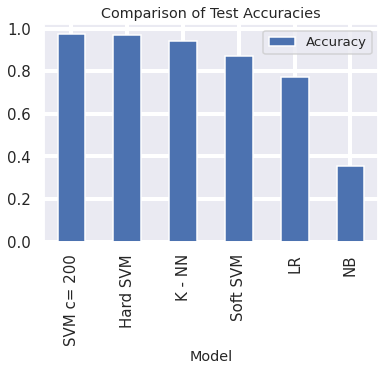

In [ ]:

models.plot(x="Model", y="Accuracy", kind="bar", fontsize=15, title="Comparison of Test Accuracies")


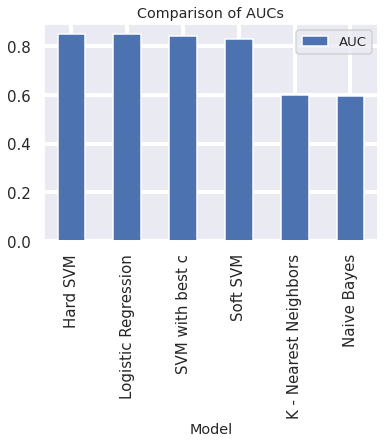

In [ ]:
# bar plot for auc
models_auc = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 
              'K - Nearest Neighbors','Hard SVM', 'Soft SVM','SVM with best c'],
    'AUC': [roc_auc_logis, roc_auc_naive, roc_auc_KNN, roc_auc_HardSVM, roc_auc_SoftSVM, roc_auc_bestSVM]})

models_auc = models_auc.sort_values(by='AUC',ascending= False)

models_auc.plot(x="Model", y="AUC", kind="bar", fontsize=15, title="Comparison of AUCs")


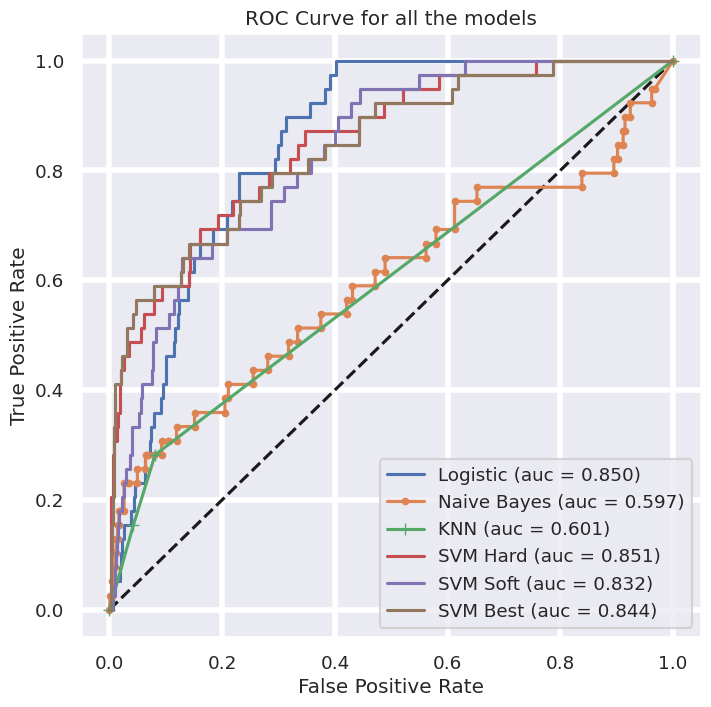

In [ ]:
plt.figure(figsize=(8, 8), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(logis_fpr, logis_tpr, linestyle='-', label='Logistic (auc = %0.3f)' % roc_auc_logis)
plt.plot(naive_fpr, naive_tpr, marker='.', label='Naive Bayes (auc = %0.3f)' % roc_auc_naive)
plt.plot(KNN_fpr, KNN_tpr, marker='+', label='KNN (auc = %0.3f)' % roc_auc_KNN)
plt.plot(HardSVM_fpr, HardSVM_tpr, linestyle='-', label='SVM Hard (auc = %0.3f)' % roc_auc_HardSVM)
plt.plot(SoftSVM_fpr, SoftSVM_tpr, linestyle='-', label='SVM Soft (auc = %0.3f)' % roc_auc_SoftSVM)
plt.plot(bestSVM_fpr, bestSVM_tpr, linestyle='-', label='SVM Best (auc = %0.3f)' % roc_auc_bestSVM)

plt.title('ROC Curve for all the models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')

# Hyperparameter Tuning for better predictions : Using Grid Search

In [ ]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'C': [1,10,20,100,200],
            'kernel': ['rbf','linear','sigmoid']
        }  
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [1,5,10],
            'solver':['lbfgs','liblinear','saga']
        }
    },
   'KNN': {
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors' : [1,3,5,7],
            'weights': ['uniform', 'distance'],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
        }
    }
}


***Implementing Grid Search CV for the models ***

In [ ]:


# X_scaled = scaler.fit_transform(x_train_smote)

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, verbose=3, n_jobs=-1, scoring = 'recall', return_train_score=False)
    clf.fit(x_train_smote, y_train_smote)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [ ]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

df.to_csv('hyperparameter.csv')

In [ ]:
print(df)

                 model  best_score  \
0                  svm    0.978521   
1  logistic_regression    0.930470   
2                  KNN    1.000000   

                                         best_params  
0                         {'C': 10, 'kernel': 'rbf'}  
1                    {'C': 5, 'solver': 'liblinear'}  
2  {'algorithm': 'auto', 'n_neighbors': 7, 'weigh...  


**The above table provides us with the tuned parameters for each of the models. Now we will implement eatch of the models and explore their accuracy and recall.**

# New Models post Hyperparameter Tuning
(only with Test Predictions)

## Logistic Regression

In [ ]:
logmodel = LogisticRegression(solver='liblinear',multi_class='auto', C = 5)
logmodel.fit(x_train_smote, y_train_smote)
log_predictions = logmodel.predict(X_test_norm)

print(classification_report(y_test,log_predictions))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87      1816
           1       0.07      0.74      0.12        39

    accuracy                           0.77      1855
   macro avg       0.53      0.76      0.49      1855
weighted avg       0.97      0.77      0.85      1855



In [ ]:
HP_LR_acc = accuracy_score(y_test, log_predictions)

In [ ]:
y_pred_logistic = logmodel.predict_proba(X_test_norm)[:,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

### Confusion Matrix for Logistic Regression

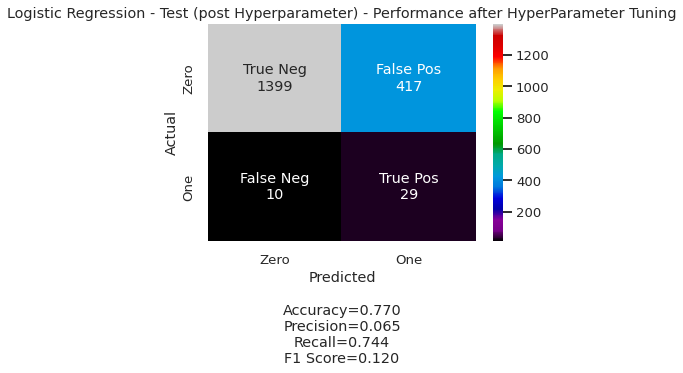

In [ ]:
model_name = 'Logistic Regression - Test (post Hyperparameter)'
cm = confusion_matrix(y_test, log_predictions)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False)
plt.title(f'{model_name} - Performance after HyperParameter Tuning')
print()

## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7,algorithm = 'auto', weights= 'distance')
knn.fit(x_train_smote, y_train_smote)
knn_pred = knn.predict(X_test_norm)

print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1816
           1       0.07      0.38      0.11        39

    accuracy                           0.87      1855
   macro avg       0.53      0.63      0.52      1855
weighted avg       0.97      0.87      0.92      1855



In [ ]:
HP_KNN_acc = accuracy_score(y_test, knn_pred)

In [ ]:
y_pred_knn = knn.predict_proba(X_test_norm)[:,1]
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

### Confusion Matrix for KNN

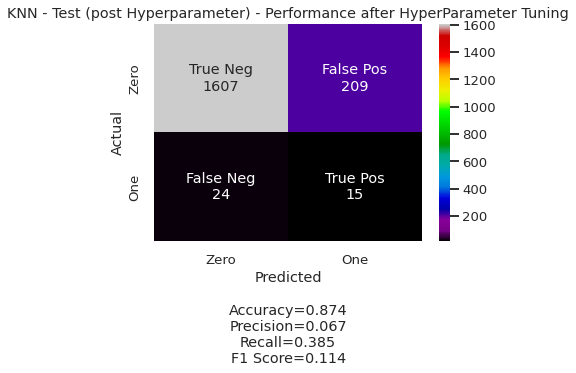

In [ ]:
model_name = 'KNN - Test (post Hyperparameter)'
cm = confusion_matrix(y_test, knn_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False)
plt.title(f'{model_name} - Performance after HyperParameter Tuning')
print()

## SVM

In [ ]:
model_svm = SVC(gamma='auto',C=10, kernel='rbf', probability=True)
model_svm.fit(x_train_smote, y_train_smote)

svm_predictions = model_svm.predict(X_test_norm)
print(classification_report(y_test,svm_predictions))


              precision    recall  f1-score   support

           0       1.00      0.72      0.84      1816
           1       0.06      0.85      0.11        39

    accuracy                           0.73      1855
   macro avg       0.53      0.78      0.48      1855
weighted avg       0.98      0.73      0.82      1855



In [ ]:

HP_SVM_acc = accuracy_score(y_test, svm_predictions)

In [ ]:
y_pred_svm = model_svm.predict_proba(X_test_norm)[:,1]
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

### Confusion Matrix - SVM

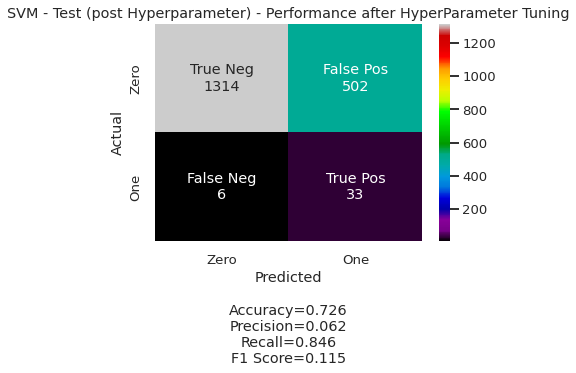

In [ ]:
model_name = 'SVM - Test (post Hyperparameter)'
cm = confusion_matrix(y_test, svm_predictions)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False)
plt.title(f'{model_name} - Performance after HyperParameter Tuning')
print()

# ROC of all graphs after hyperparameter tuning

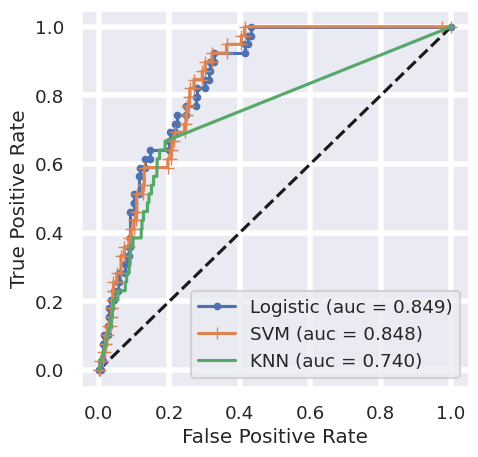

In [ ]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(svm_fpr, svm_tpr, marker='+', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')

**With Hyperparameter Tuning - the accuracy of our best model (Random Forest) has increased approx 2%**

# Test Accuracies of all models after Hyperparameter Tuning

                     Model  Test Accuracy
0      Logistic Regression       0.769811
1  Support Vector Machines       0.726146
2    K - Nearest Neighbors       0.874394 



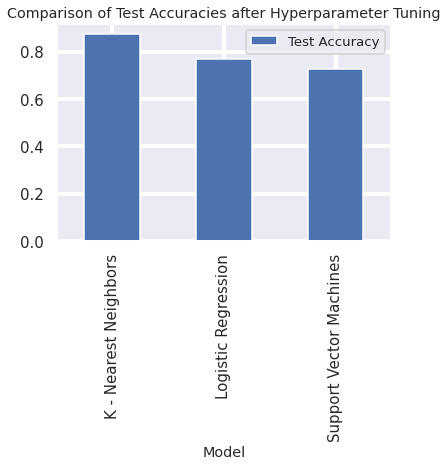

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines','K - Nearest Neighbors'],
    'Test Accuracy': [HP_LR_acc, HP_SVM_acc, HP_KNN_acc]})

print(models,"\n")

models = models.sort_values(by='Test Accuracy',ascending= False)

models.plot(x="Model", y="Test Accuracy", kind="bar", fontsize=15, title="Comparison of Test Accuracies after Hyperparameter Tuning")

# Feature Importance for best model (SVM)

**Feature importance - What features have the biggest impact on predictions?**



In [ ]:
from sklearn import svm
import matplotlib.pyplot as plt
def feature_plot(classifier, feature_names, top_features=10):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(18, 7))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.show()



Once having fitted our linear SVM it is possible to access the classifier coefficients using .coef_ on the trained model. These weights figure the orthogonal vector coordinates orthogonal to the hyperplane. Their direction represents instead the predicted class.
Feature importance can, therefore, be determined by comparing the size of these coefficients to each other. By looking at the SVM coefficients it is, therefore, possible to identify the main features used in classification and get rid of the not important ones (which hold less variance).
Reducing the number of features in Machine Learning plays a really important role especially when working with large datasets. This can in fact: speed up training, avoid overfitting and ultimately lead to better classification results thanks to the reduced noise in the data.

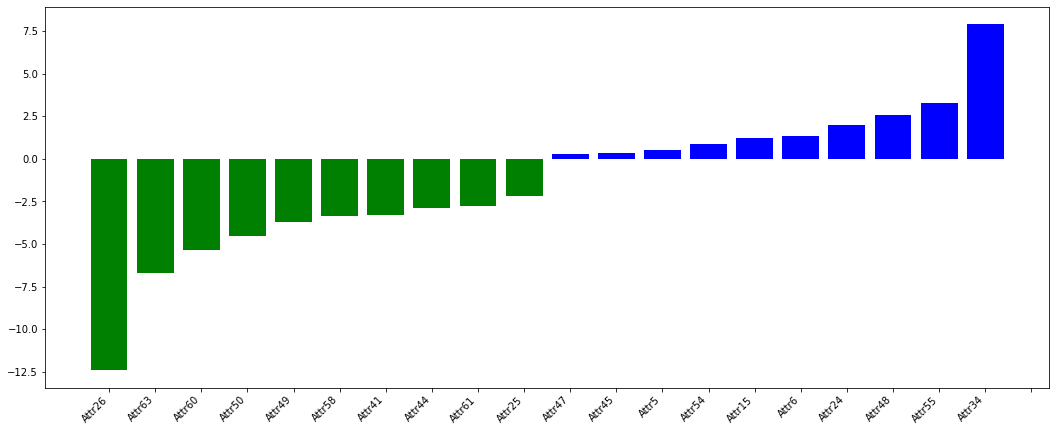

In [ ]:
# Linear SVM help us access the classifier coefficients

trainedsvm = svm.LinearSVC().fit(x_train_smote, y_train_smote)
feature_plot(trainedsvm, df.drop(['class'], axis = 1).columns.values)

# Gaussian Kernel SVM - Feature Importance

In Hyperparameter Tuning we used Gaussian Kernel SVM and Permutation importance is calculated after a model has been fitted. It is one of the methods to calculate the Feature Importance. 

In [ ]:
!pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model_svm, random_state=1).fit(x_train_smote, y_train_smote)


In [ ]:
eli5.show_weights(perm, feature_names = x_train_smote.columns.tolist())

Weight,Feature
0.2044 ± 0.0079,Attr34
0.0761 ± 0.0048,Attr26
0.0675 ± 0.0019,Attr63
0.0496 ± 0.0014,Attr25
0.0463 ± 0.0027,Attr50
0.0327 ± 0.0038,Attr48
0.0199 ± 0.0030,Attr1
0.0137 ± 0.0009,Attr36
0.0112 ± 0.0015,Attr61
0.0098 ± 0.0008,Attr55


**In our example, the most important feature were 
1. Attribute 34 - (operating expenses / total liabilities)
2. Attribute 26 - (net profit + depreciation) / total liabilities)
3. Attribute 63 - (sales / short-term liabilities)
4. Attribute 25 - (equity - share capital) / total assets)
5. Attribute 50 - (current assets / total liabilities)
 **

# **Prediction on the test data**

In [ ]:
# Read the Test data
test = pd.read_csv('bankruptcy_Test_X.csv')

In [ ]:
# Dropping the same attributes in Test(Unseen) as in train dataset to predict the output variable ( 0 or 1)
test = test.drop(['Attr3',
 'Attr2',
 'Attr8',
 'Attr7',
 'Attr11',
 'Attr12',
 'Attr14',
 'Attr10',
 'Attr16',
 'Attr13',
 'Attr18',
 'Attr19',
 'Attr22',
 'Attr23',
 'Attr9',
 'Attr31',
 'Attr39',
 'Attr20',
 'Attr43',
 'Attr4',
 'Attr40',
 'Attr35',
 'Attr42',
 'Attr17',
 'Attr38',
 'Attr32',
 'Attr28',
 'Attr53',
 'Attr56',
 'Attr30',
 'Attr52',
 'Attr33', 'ID'], axis=1)

In [ ]:
y_test_pred = model_svm.predict(test)

In [ ]:
print(y_test_pred)

[1 1 0 ... 1 1 1]


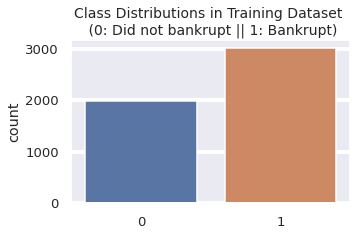

In [ ]:
# Checking labels distribution in the given Test Data
sns.set_theme(context = 'talk', style='darkgrid', palette='deep', font='sans-serif', font_scale = 0.8, rc={"grid.linewidth": 4})

plt.figure(figsize = (5,3))
sns.countplot(y_test_pred)
plt.title('Class Distributions in Training Dataset \n (0: Did not bankrupt || 1: Bankrupt)', fontsize=14)
plt.show()